# Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Uploading both the given datasets

In [4]:
df = pd.read_excel(r"C:\Users\kashy\Downloads\drive-download-20241010T091033Z-001\diabetic_data.xlsx")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df1 = pd.read_csv(r"C:\Users\kashy\Downloads\drive-download-20241010T091033Z-001\mimic_iii_data.csv")
df1.head()

,Patient_ID,ICU_Admission_ID,ICU_Length_of_Stay,Diagnoses,Blood_Glucose,Creatinine,Hemoglobin,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,8222157,1001,14,Hypertension,146,0.781847,16.968111,4.593931,110,116,68,97,16,36.509798,NaN,9,1,0
1,55629189,1002,3,Stroke,174,3.188024,15.667593,7.431865,74,148,63,95,16,37.639906,Steroids,6,2,0
2,86047875,1003,4,Stroke,154,1.859621,13.871892,10.992984,96,171,72,87,17,37.377471,Insulin,7,4,0
3,82442376,1004,12,Sepsis,91,3.090111,14.341255,8.944880,78,123,84,91,12,39.114581,Steroids,13,4,1
4,42519267,1005,14,Pneumonia,92,1.030121,10.439457,9.796323,105,133,104,91,19,38.287349,Antibiotics,8,5,0


# Analyzing the given datasets

In [7]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,100000.0,4.845960e+07,3.939606e+07,135.000000,1.660440e+07,4.037291e+07,8.398877e+07,1.895026e+08
ICU_Admission_ID,100000.0,5.100050e+04,2.886766e+04,1001.000000,2.600075e+04,5.100050e+04,7.600025e+04,1.010000e+05
ICU_Length_of_Stay,100000.0,8.508040e+00,3.458074e+00,3.000000,5.000000e+00,9.000000e+00,1.200000e+01,1.400000e+01
Blood_Glucose,100000.0,1.343158e+02,3.755408e+01,70.000000,1.020000e+02,1.340000e+02,1.670000e+02,1.990000e+02
Creatinine,100000.0,1.998175e+00,8.636014e-01,0.500059,1.249084e+00,1.997081e+00,2.745601e+00,3.499976e+00
Hemoglobin,100000.0,1.349567e+01,2.023248e+00,10.000036,1.173970e+01,1.348617e+01,1.524476e+01,1.699990e+01
WBC,100000.0,7.997141e+00,2.299960e+00,4.000026,6.022321e+00,7.993527e+00,9.985847e+00,1.199963e+01
Heart_Rate,100000.0,8.948942e+01,1.730945e+01,60.000000,7.500000e+01,8.900000e+01,1.040000e+02,1.190000e+02
Blood_Pressure_Systolic,100000.0,1.346479e+02,2.596303e+01,90.000000,1.120000e+02,1.350000e+02,1.570000e+02,1.790000e+02
Blood_Pressure_Diastolic,100000.0,8.942143e+01,1.735188e+01,60.000000,7.400000e+01,8.900000e+01,1.040000e+02,1.190000e+02


In [10]:
df.shape

(101766, 50)

In [11]:
df1.shape

(100000, 18)

In [12]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [13]:
df1.columns

Index(['Patient_ID', 'ICU_Admission_ID', 'ICU_Length_of_Stay', 'Diagnoses',
       'Blood_Glucose', 'Creatinine', 'Hemoglobin', 'WBC', 'Heart_Rate',
       'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'SpO2',
       'Respiratory_Rate', 'Temperature', 'Medications', 'Number_of_Lab_Tests',
       'Number_of_Medications', 'Readmission_Flag'],
      dtype='object')

# Finding the Missing Values

In [15]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [16]:
df1.isnull().sum()

Patient_ID                      0
ICU_Admission_ID                0
ICU_Length_of_Stay              0
Diagnoses                       0
Blood_Glucose                   0
Creatinine                      0
Hemoglobin                      0
WBC                             0
Heart_Rate                      0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
SpO2                            0
Respiratory_Rate                0
Temperature                     0
Medications                 24881
Number_of_Lab_Tests             0
Number_of_Medications           0
Readmission_Flag                0
dtype: int64

# Checking for the '?' sign in the dataset

In [18]:
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [19]:
#In the dataset missing values are represented as '?' sign
for col in df1.columns:
    if df1[col].dtype == object:
         print(col,df1[col][df1[col] == '?'].count())

Diagnoses 0
Medications 0


# Handling the Missing Values

In [21]:
df['weight'].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [22]:
df['payer_code'].value_counts()

payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64

In [23]:
# Replace remaining "?"" values with np.nan
df = df.replace("?",np.nan)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [24]:
# Filling the missing values in Medications on the basis of Vital signs.
df1['Medications'] = df1.groupby(['Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'SpO2', 'Respiratory_Rate', 'Temperature'])['Medications'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

# Fill any remaining NaNs with the overall mode of Medications
overall_mode = df1['Medications'].mode()[0]
df1['Medications'].fillna(overall_mode, inplace=True)
df1

C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\3851780868.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\3851780868.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Medications'].f

,Patient_ID,ICU_Admission_ID,ICU_Length_of_Stay,Diagnoses,Blood_Glucose,Creatinine,Hemoglobin,WBC,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,8222157,1001,14,Hypertension,146,0.781847,16.968111,4.593931,110,116,68,97,16,36.509798,Antibiotics,9,1,0
1,55629189,1002,3,Stroke,174,3.188024,15.667593,7.431865,74,148,63,95,16,37.639906,Steroids,6,2,0
2,86047875,1003,4,Stroke,154,1.859621,13.871892,10.992984,96,171,72,87,17,37.377471,Insulin,7,4,0
3,82442376,1004,12,Sepsis,91,3.090111,14.341255,8.944880,78,123,84,91,12,39.114581,Steroids,13,4,1
4,42519267,1005,14,Pneumonia,92,1.030121,10.439457,9.796323,105,133,104,91,19,38.287349,Antibiotics,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,95619681,100996,6,Hypertension,144,3.005136,16.629977,8.205571,103,99,68,99,13,37.306897,Steroids,13,3,0
99996,24244983,100997,14,Heart Failure,134,1.511976,14.192766,6.054444,85,156,83,92,17,37.021202,Steroids,19,4,0
99997,21709845,100998,14,Diabetes,130,1.892404,16.083987,10.152384,99,163,91,93,13,36.018058,Antibiotics,8,4,0
99998,94556493,100999,6,Hypertension,92,0.662018,16.852472,5.619990,97,119,62,91,14,36.426754,Antibiotics,7,5,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient_ID                100000 non-null  int64  
 1   ICU_Admission_ID          100000 non-null  int64  
 2   ICU_Length_of_Stay        100000 non-null  int64  
 3   Diagnoses                 100000 non-null  object 
 4   Blood_Glucose             100000 non-null  int64  
 5   Creatinine                100000 non-null  float64
 6   Hemoglobin                100000 non-null  float64
 7   WBC                       100000 non-null  float64
 8   Heart_Rate                100000 non-null  int64  
 9   Blood_Pressure_Systolic   100000 non-null  int64  
 10  Blood_Pressure_Diastolic  100000 non-null  int64  
 11  SpO2                      100000 non-null  int64  
 12  Respiratory_Rate          100000 non-null  int64  
 13  Temperature               100000 non-null  fl

# As observed weight and payer_code column has more than 98% & 40% missing values hence, we have dropped the given columns

In [27]:
# Drop weight, payer_code and medical_specialty columns due to number of "?" values
df.drop(['weight','payer_code'], axis=1, inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,NaN,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,NaN,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),2,3,7,10,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [28]:
df.shape

(101766, 48)

# Used data engineering and featuring for the standardization of the dataset 

In [30]:
#Data Engineering

df['readmitted'] = df['readmitted'].replace('>30',2)
df['readmitted'] = df['readmitted'].replace('<30',1)
df['readmitted'] = df['readmitted'].replace('NO',0)

print('>30 readmissions',df['readmitted'][df['readmitted'] == 2].count())
print('<30 readmissions',df['readmitted'][df['readmitted'] == 1].count())
print('no readmissions',df['readmitted'][df['readmitted'] == 0].count())

>30 readmissions 35545
<30 readmissions 11357
no readmissions 54864


C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\1029521587.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['readmitted'] = df['readmitted'].replace('NO',0)


In [31]:
#Data Featuring

df['admission_type_id'] = df['admission_type_id'].replace(2,1)
df['admission_type_id'] = df['admission_type_id'].replace(7,1)
df['admission_type_id'] = df['admission_type_id'].replace(6,5)
df['admission_type_id'] = df['admission_type_id'].replace(8,5)

df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(6,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(8,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(9,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(13,1)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(3,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(4,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(5,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(14,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(22,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(23,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(24,2)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(12,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(15,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(16,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(17,10)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(19,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(20,11)
df['discharge_disposition_id'] = df['discharge_disposition_id'].replace(21,11)

In [32]:
#Dropping the unnecessary columns:

df.drop(['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton','glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'], axis=1, inplace=True)
df

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),5,25,1,1,Pediatrics-Endocrinology,...,250.83,NaN,NaN,1,NaN,NaN,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,276,250.01,255,9,NaN,NaN,Up,Ch,Yes,2
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,648,250,V27,6,NaN,NaN,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,8,250.43,403,7,NaN,NaN,Up,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,197,157,250,5,NaN,NaN,Steady,Ch,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),1,2,7,3,NaN,...,250.13,291,458,9,NaN,>8,Down,Ch,Yes,2
101762,443847782,74694222,AfricanAmerican,Female,[80-90),1,2,5,5,NaN,...,560,276,787,9,NaN,NaN,Steady,No,Yes,0
101763,443854148,41088789,Caucasian,Male,[70-80),1,1,7,1,NaN,...,38,590,296,13,NaN,NaN,Down,Ch,Yes,0
101764,443857166,31693671,Caucasian,Female,[80-90),1,2,7,10,Surgery-General,...,996,285,998,9,NaN,NaN,Up,Ch,Yes,0


# Converting patient IDs to consistent format

In [34]:
df['patient_nbr'] = df['patient_nbr'].astype(str)
df1['Patient_ID'] = df1['Patient_ID'].astype(str)

# Merging the provided dataset

In [36]:
# Merging based on patient ID

df_combined = pd.merge(df, df1, left_on='patient_nbr', right_on='Patient_ID', how='inner')
df_combined.head(5)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,SpO2,Respiratory_Rate,Temperature,Medications,Number_of_Lab_Tests,Number_of_Medications,Readmission_Flag
0,2278392,8222157,Caucasian,Female,[0-10),5,25,1,1,Pediatrics-Endocrinology,...,110,116,68,97,16,36.509798,Antibiotics,9,1,0
1,2278392,8222157,Caucasian,Female,[0-10),5,25,1,1,Pediatrics-Endocrinology,...,85,160,61,92,15,39.599822,Antibiotics,17,3,1
2,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,74,148,63,95,16,37.639906,Steroids,6,2,0
3,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,61,128,75,87,21,39.013647,Insulin,19,3,0
4,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,96,171,72,87,17,37.377471,Insulin,7,4,0


In [37]:
df_combined.duplicated().sum()

0

In [38]:
df_combined.shape

(141325, 44)

In [39]:
df_combined.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'Patient_ID', 'ICU_Admission_ID',
       'ICU_Length_of_Stay', 'Diagnoses', 'Blood_Glucose', 'Creatinine',
       'Hemoglobin', 'WBC', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'SpO2', 'Respiratory_Rate', 'Temperature',
       'Medications', 'Number_of_Lab_Tests', 'Number_of_Medications',
       'Readmission_Flag'],
      dtype='object')

# Below codes allows us to come to the conclusion which join shall be used for combining the given dataset

In [41]:
missing_p_nbr = df.loc[~df['patient_nbr'].isin(df1['Patient_ID']), 'patient_nbr'].unique()
print(missing_p_nbr)

[]


In [42]:
missing_p_id = df1.loc[~df1['Patient_ID'].isin(df['patient_nbr']), 'Patient_ID'].unique()
print(missing_p_id)

[]


In [43]:
# Convert missing Patient_IDs to a list
missing_p_id_list = missing_p_id.tolist()

# Print the list (this will show all IDs without truncation)
print(missing_p_id_list)

[]


In [44]:
num_missing_patients = len(missing_p_id)
print("Number of missing patients:", num_missing_patients)

Number of missing patients: 0


# Extracting the key features from the dataset

In [46]:
key_feat = df_combined[['race', 'gender', 'age', 'A1Cresult', 'Blood_Glucose','Hemoglobin', 'Heart_Rate','Diagnoses']]
key_feat.describe()

,Blood_Glucose,Hemoglobin,Heart_Rate
count,141325.000000,141325.000000,141325.000000
mean,134.324012,13.490677,89.468113
std,37.549941,2.022571,17.317112
min,70.000000,10.000036,60.000000
25%,102.000000,11.736391,74.000000
50%,134.000000,13.474876,89.000000
75%,167.000000,15.236653,104.000000
max,199.000000,16.999904,119.000000


In [47]:
key_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141325 entries, 0 to 141324
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   race           137858 non-null  object 
 1   gender         141325 non-null  object 
 2   age            141325 non-null  object 
 3   A1Cresult      23787 non-null   object 
 4   Blood_Glucose  141325 non-null  int64  
 5   Hemoglobin     141325 non-null  float64
 6   Heart_Rate     141325 non-null  int64  
 7   Diagnoses      141325 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 8.6+ MB


# Exploratory Data Analysis

In [49]:
clinical_summary = df_combined[['ICU_Length_of_Stay', 'number_diagnoses', 'num_lab_procedures']].describe()
print(clinical_summary)

       ICU_Length_of_Stay  number_diagnoses  num_lab_procedures
count       141325.000000     141325.000000       141325.000000
mean             8.478358          7.240658           43.432125
std              3.458078          1.983705           19.338792
min              3.000000          1.000000            1.000000
25%              5.000000          6.000000           32.000000
50%              8.000000          8.000000           44.000000
75%             11.000000          9.000000           57.000000
max             14.000000         16.000000          132.000000


In [50]:
#Patient Demographics

demographics_summary = df_combined[['age', 'gender', 'race']].describe()
print(demographics_summary)

            age  gender       race
count    141325  141325     137858
unique       10       3          5
top     [70-80)  Female  Caucasian
freq      36472   76053     103951


# Investigate how these variables relate to patient outcomes such as readmission

In [52]:
df_combined.groupby('readmitted')['number_diagnoses'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
0,76801.0,7.017643,2.060577,1.0,5.0,8.0,9.0,16.0
1,15930.0,7.542247,1.818047,1.0,6.0,8.0,9.0,16.0
2,48594.0,7.494259,1.864832,1.0,6.0,8.0,9.0,16.0


In [53]:
df_combined.groupby('readmitted')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
0,76801.0,42.564667,19.449011,1.0,31.0,44.0,56.0,126.0
1,15930.0,44.631325,18.954472,1.0,34.0,45.0,58.0,132.0
2,48594.0,44.409989,19.221208,1.0,33.0,45.0,58.0,129.0


In [54]:
df_combined.groupby('readmitted')['ICU_Length_of_Stay'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
0,76801.0,8.508092,3.458555,3.0,5.0,9.0,12.0,14.0
1,15930.0,8.444947,3.462944,3.0,5.0,8.0,11.0,14.0
2,48594.0,8.442318,3.455354,3.0,5.0,8.0,11.0,14.0


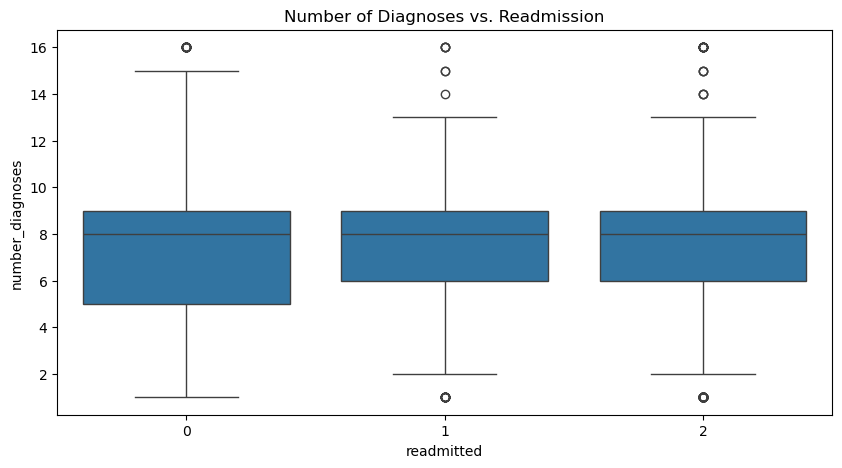

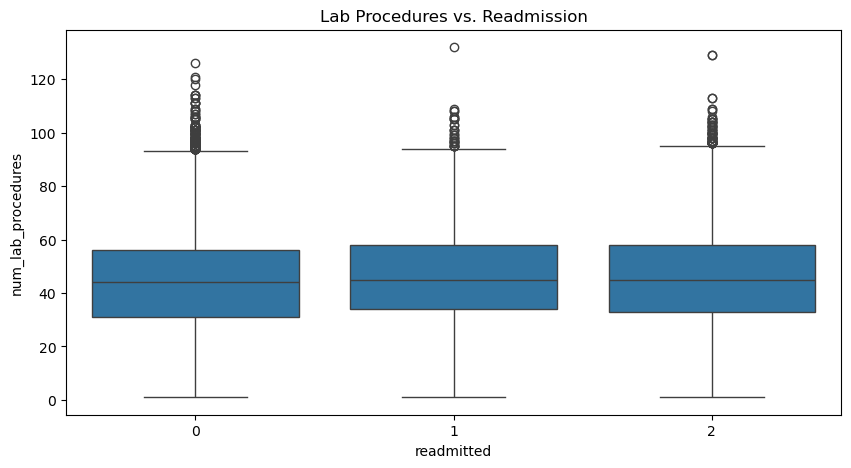

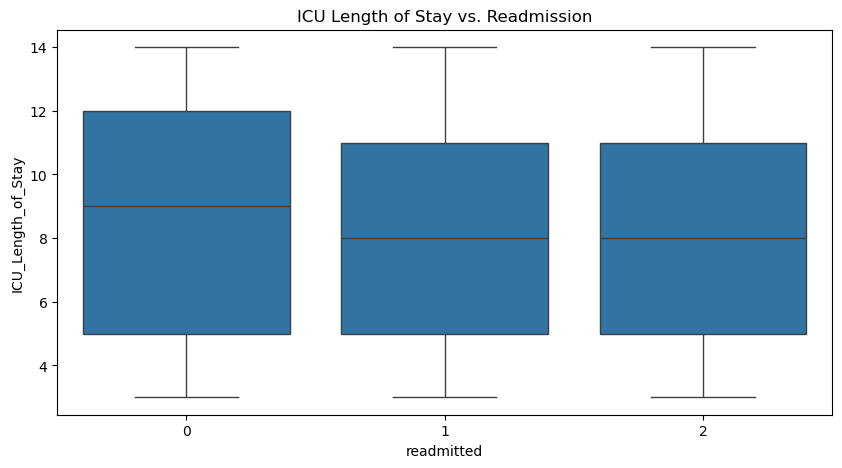

In [55]:
# Number diagnoses vs. readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='number_diagnoses', data=df_combined)
plt.title('Number of Diagnoses vs. Readmission')
plt.show()

# Number Lab procedures vs. readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df_combined)
plt.title('Lab Procedures vs. Readmission')
plt.show()

# ICU Length of Stay vs. Readmission (if available)
if 'ICU_Length_of_Stay' in df_combined.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='readmitted', y='ICU_Length_of_Stay', data=df_combined)
    plt.title('ICU Length of Stay vs. Readmission')
    plt.show()

# Initial summary statistics for key variables to understand data distributions and potential trends.

# Univariate Analysis

In [58]:
df_combined['gender'].value_counts()

gender
Female             76053
Male               65268
Unknown/Invalid        4
Name: count, dtype: int64

In [59]:
percentage = (76053 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (65268 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (4 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

The percentage is 53.81%
The percentage is 46.18%
The percentage is 0.00%


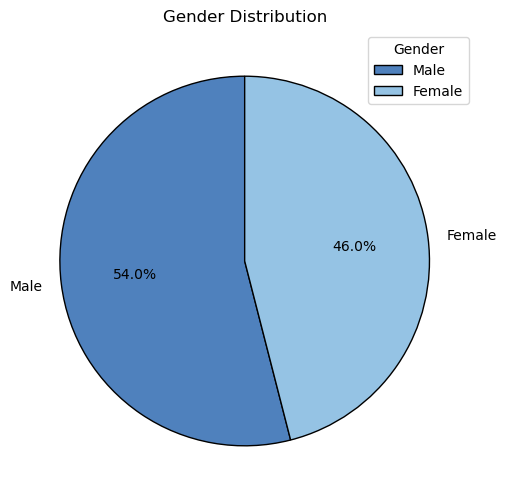

In [60]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Male', 'Female']
sizes = [54, 46]  # Example counts or percentages of each gender
colors = ['#4f81bd', '#95c3e4']  # Custom colors for Male and Female

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title for the pie chart
plt.title('Gender Distribution')
plt.legend(labels, title="Gender", loc="upper right")


# Display the pie chart
plt.show()

In [61]:
df_combined['diabetesMed'].value_counts()

diabetesMed
Yes    107911
No      33414
Name: count, dtype: int64

In [62]:
percentage = (107911 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (33414 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

The percentage is 76.36%
The percentage is 23.64%


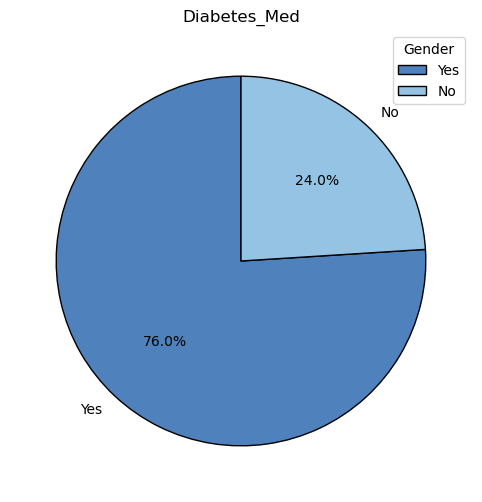

In [63]:
# Data for the pie chart
labels = ['Yes', 'No']
sizes = [76, 24]  # Example counts or percentages of each gender
colors = ['#4f81bd', '#95c3e4']  # Custom colors for Male and Female

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title for the pie chart
plt.title('Diabetes_Med')
plt.legend(labels, title="Gender", loc="upper right")


# Display the pie chart
plt.show()

In [64]:
# Show count of output value
# 2 = >30 readmissions 48594
# 1 = <30 readmissions 15930
# 0 = no readmissions 76801

df_combined['readmitted'].value_counts()

readmitted
0    76801
2    48594
1    15930
Name: count, dtype: int64

In [65]:
percentage = (76801 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (48594 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (15930 / 141325) * 100
print(f"The percentage is {percentage:.2f}%")

The percentage is 54.34%
The percentage is 34.38%
The percentage is 11.27%


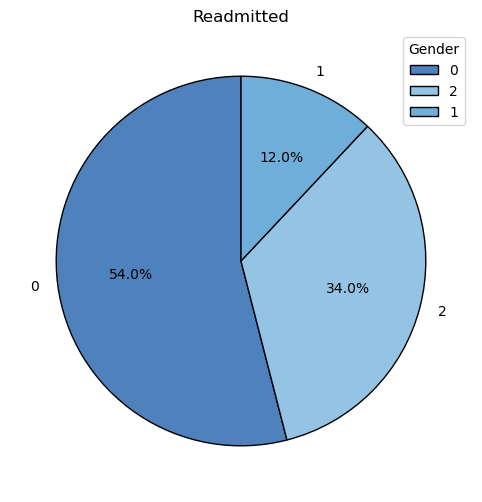

In [66]:
# Data for the pie chart
labels = ['0','2', '1']
sizes = [54, 34,12]  # Example counts or percentages of each gender
colors = ['#4f81bd', '#95c3e4','#6faed9']  # Custom colors for Male and Female

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title for the pie chart
plt.title('Readmitted')
plt.legend(labels, title="Gender", loc="upper right")


# Display the pie chart
plt.show()

In [67]:
df_combined['insulin'].value_counts()

insulin
No        67848
Steady    43655
Down      15803
Up        14019
Name: count, dtype: int64

In [68]:
# Encoded the values for the readmitted & coulmn.

df['insulin'] = df['readmitted'].replace('Up',2)
df['insulin'] = df['readmitted'].replace('Steady & Down',1)
df['insulin'] = df['readmitted'].replace('NO',0)

print('Up',df['insulin'][df['insulin'] == 2].count())
print('Steady & Down',df['insulin'][df['insulin'] == 1].count())
print('No',df['insulin'][df['insulin'] == 0].count())

Up 35545
Steady & Down 11357
No 54864


In [69]:
percentage = (54861 / 101763) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (35545 / 101763) * 100
print(f"The percentage is {percentage:.2f}%")

percentage = (11357 / 101763) * 100
print(f"The percentage is {percentage:.2f}%")

The percentage is 53.91%
The percentage is 34.93%
The percentage is 11.16%


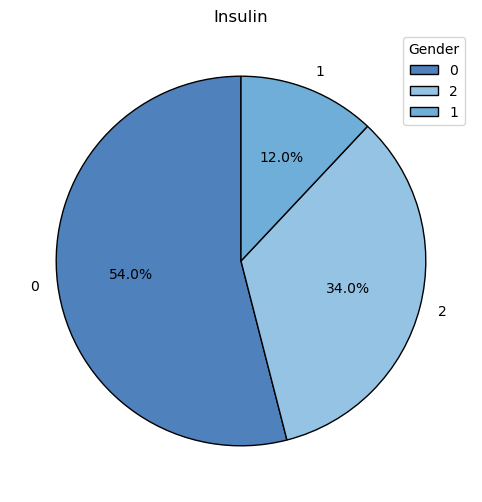

In [70]:
# Data for the pie chart
labels = ['0','2', '1']
sizes = [54, 34,12]  # Example counts or percentages of each gender
colors = ['#4f81bd', '#95c3e4','#6faed9']  # Custom colors for Male and Female

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Title for the pie chart
plt.title('Insulin')
plt.legend(labels, title="Gender", loc="upper right")


# Display the pie chart
plt.show()

# Visualization using histograms, box plots, and scatter plots to represent the distribution of key variables (e.g., ICU length of stay, number of lab procedures,readmission rate

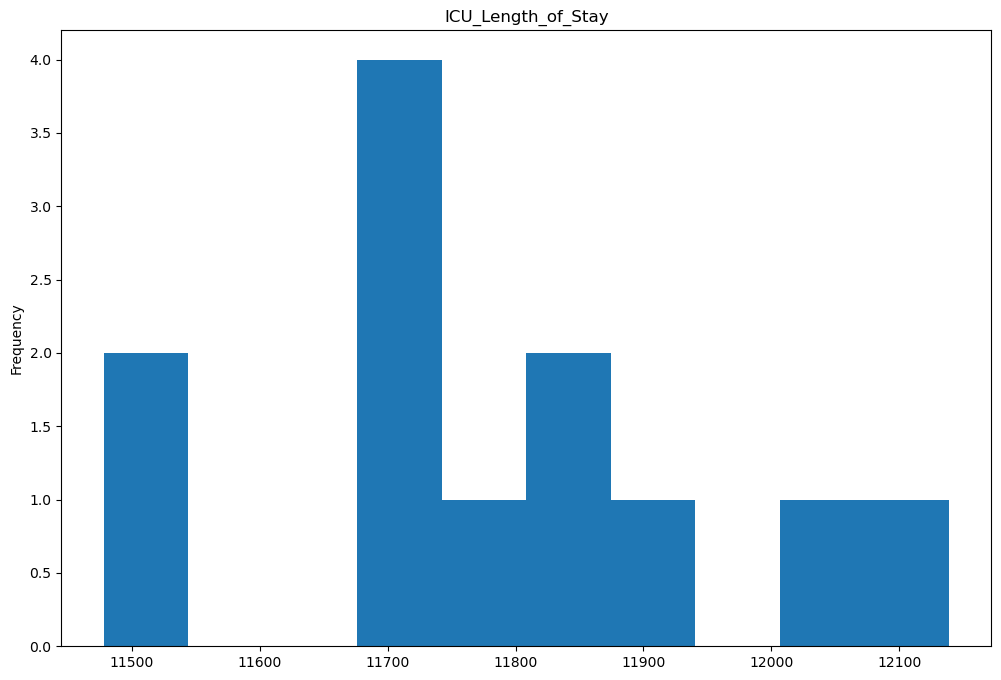

In [72]:
plt.figure(figsize=(12,8))
df_combined['ICU_Length_of_Stay'].value_counts().plot(kind='hist')
plt.title('ICU_Length_of_Stay')
plt.show()

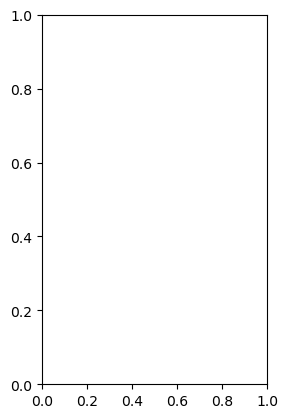

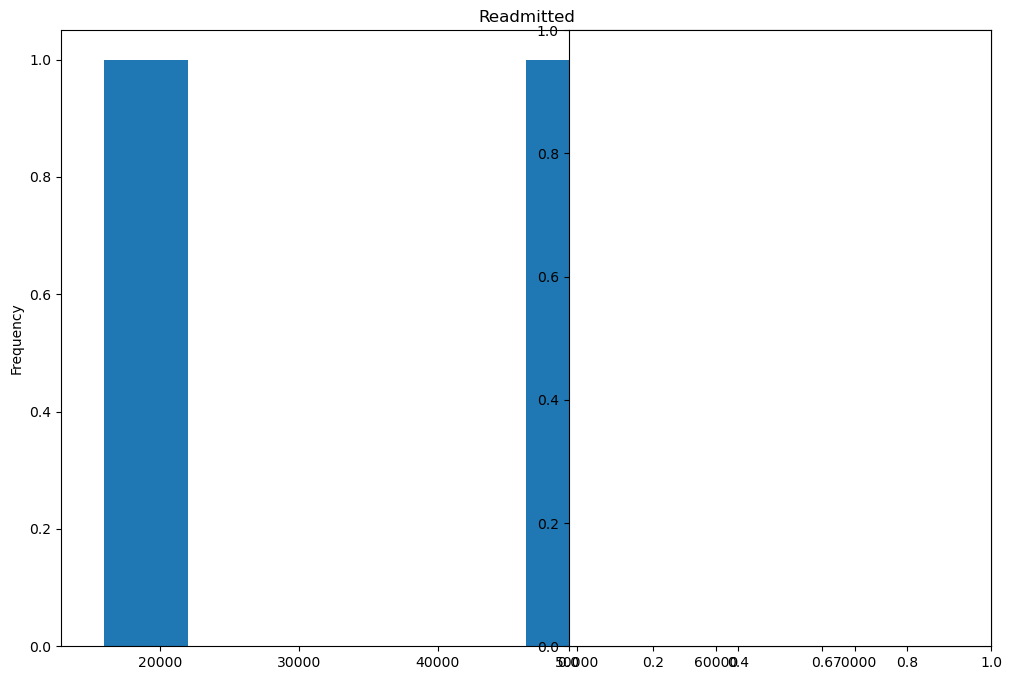

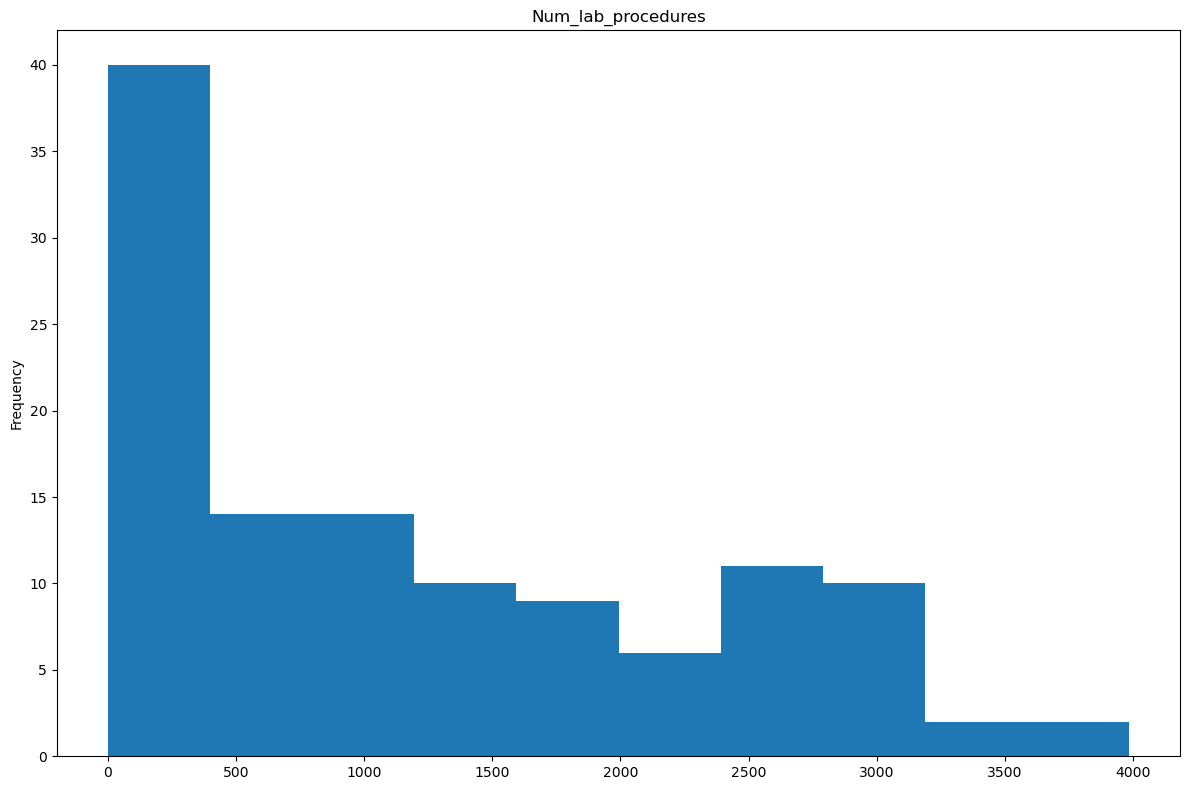

In [73]:
plt.subplot(1, 2, 1)
plt.figure(figsize=(12,8))
df_combined['readmitted'].value_counts().plot(kind='hist')
plt.title('Readmitted')

plt.subplot(1, 2, 2)
plt.figure(figsize=(12,8))
df_combined['num_lab_procedures'].value_counts().plot(kind='hist')
plt.title('Num_lab_procedures')

plt.tight_layout()
plt.show()

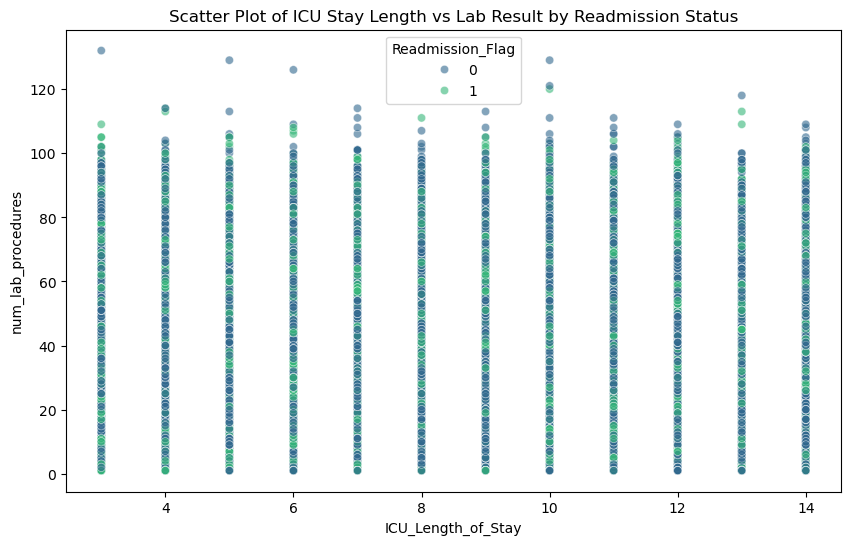

In [74]:
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(
    data=df_combined, 
    x='ICU_Length_of_Stay', 
    y='num_lab_procedures', 
    hue='Readmission_Flag', 
    palette='viridis',  # Choose a color palette
    alpha=0.6           # Set transparency for better visibility
)

# Add titles and labels
plt.title("Scatter Plot of ICU Stay Length vs Lab Result by Readmission Status")
plt.xlabel("ICU_Length_of_Stay")
plt.ylabel("num_lab_procedures")
plt.legend(title="Readmission_Flag")

plt.show()

# Bivariate Analysis

In [76]:
df_combined['max_glu_serum'].value_counts()

max_glu_serum
Norm    4910
>200    2822
>300    2157
Name: count, dtype: int64

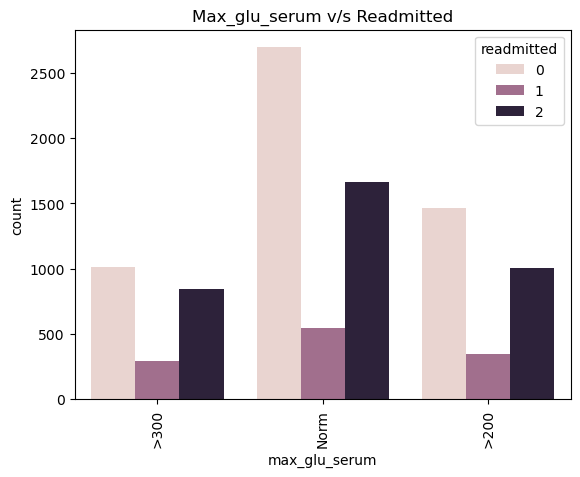

In [77]:
# Visualize count of output value
sns.set_palette("hls")
sns.countplot(x='max_glu_serum', hue= "readmitted", data = df_combined)
plt.xticks(rotation=90)
plt.title("Max_glu_serum v/s Readmitted")
plt.show()

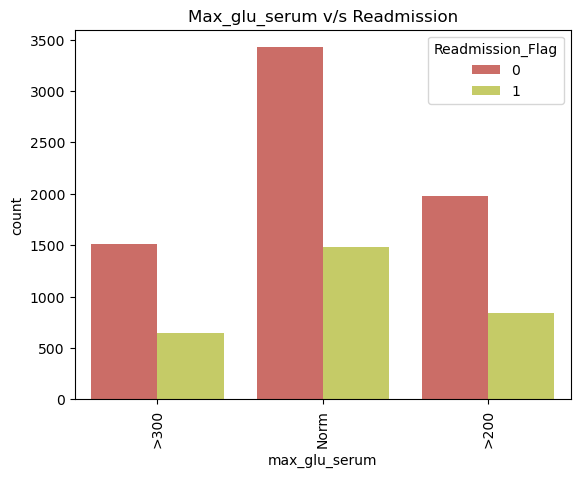

In [78]:
# Visualize count of output value
sns.set_palette("hls")
sns.countplot(x='max_glu_serum', hue= "Readmission_Flag", data = df_combined)
plt.xticks(rotation=90)
plt.title("Max_glu_serum v/s Readmission")
plt.show()

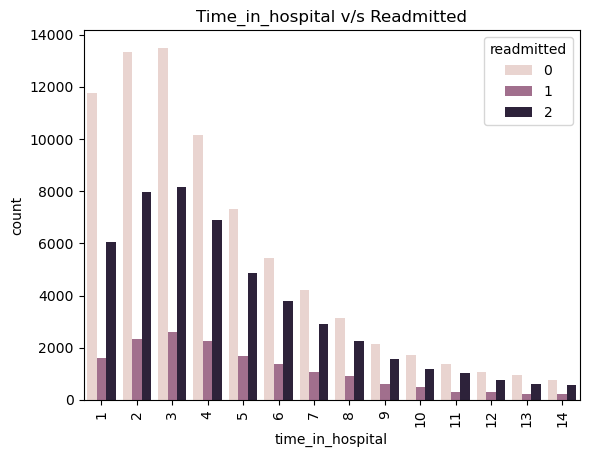

In [79]:
sns.set_palette("hls")
sns.countplot(x='time_in_hospital', hue= "readmitted", data = df_combined)
plt.xticks(rotation=90)
plt.title("Time_in_hospital v/s Readmitted")
plt.show()

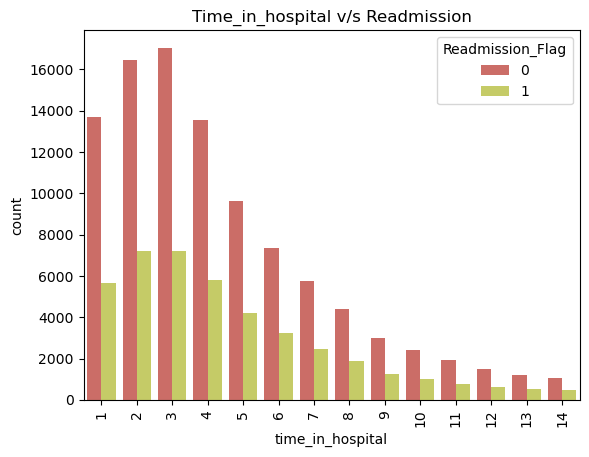

In [80]:
sns.set_palette("hls")
sns.countplot(x='time_in_hospital', hue= "Readmission_Flag", data = df_combined)
plt.xticks(rotation=90)
plt.title("Time_in_hospital v/s Readmission")
plt.show()

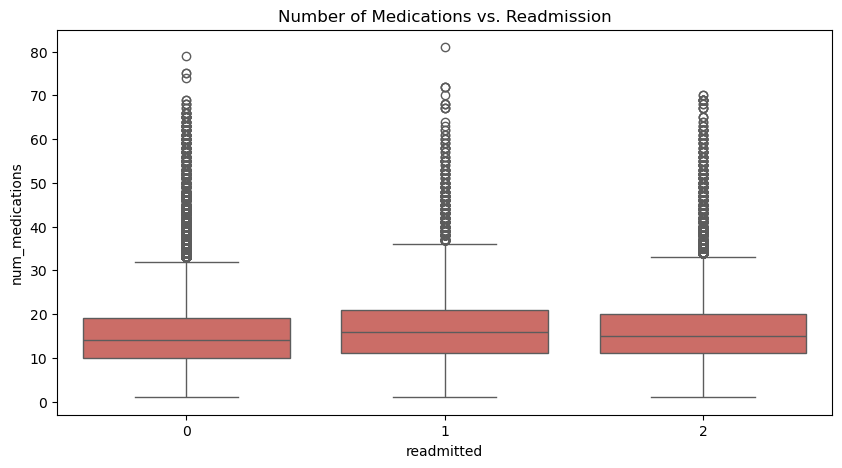

In [81]:
# Number Medications vs. readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='num_medications', data=df_combined)
plt.title('Number of Medications vs. Readmission')
plt.show()

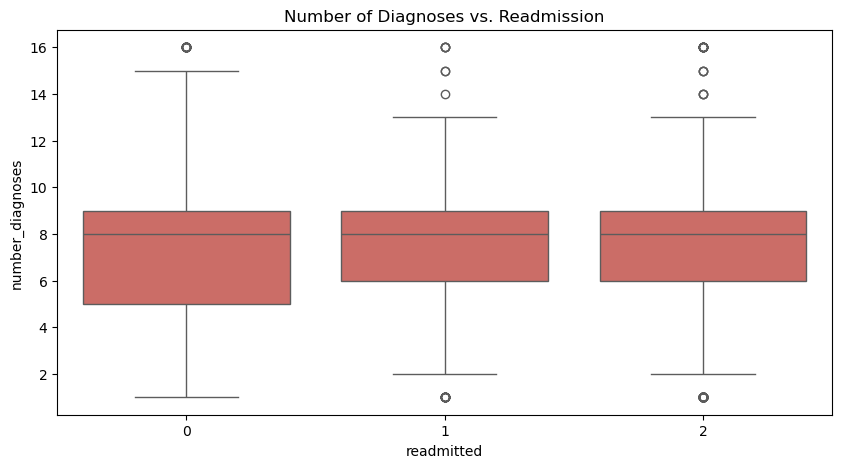

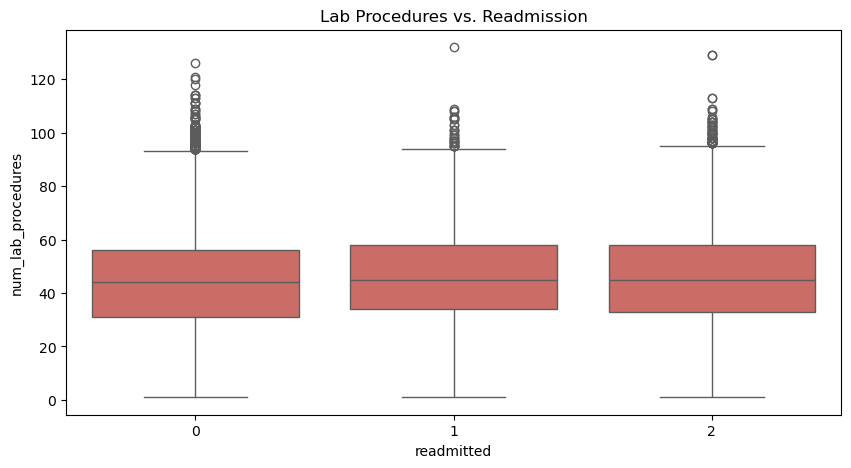

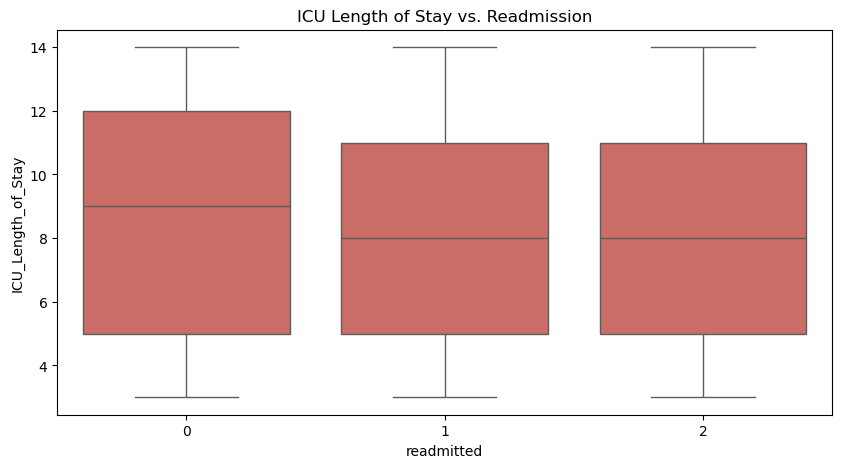

In [82]:
# Number diagnoses vs. readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='number_diagnoses', data=df_combined)
plt.title('Number of Diagnoses vs. Readmission')
plt.show()

# Number Lab procedures vs. readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='num_lab_procedures', data=df_combined)
plt.title('Lab Procedures vs. Readmission')
plt.show()

# ICU Length of Stay vs. Readmission (if available)
if 'ICU_Length_of_Stay' in df_combined.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='readmitted', y='ICU_Length_of_Stay', data=df_combined)
    plt.title('ICU Length of Stay vs. Readmission')
    plt.show()

# Analyze Patient Demographics

In [84]:
# Show count of output value
# 2 = >30 readmissions 48594
# 1 = <30 readmissions 15930
# 0 = no readmissions 76801

df_combined['readmitted'].value_counts()

readmitted
0    76801
2    48594
1    15930
Name: count, dtype: int64

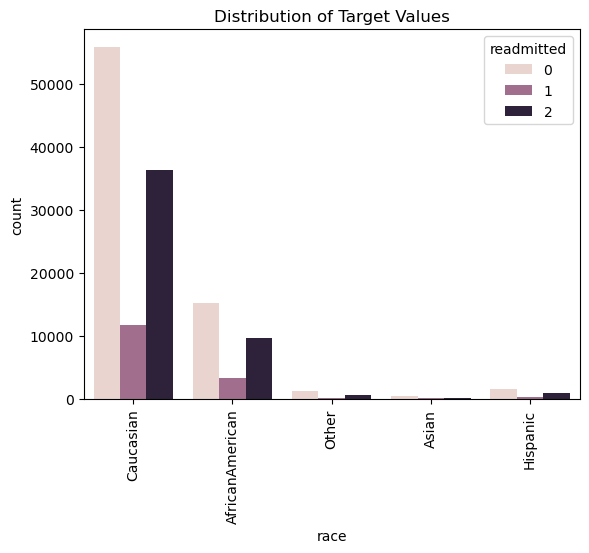

In [85]:
# Visualize count of output value
sns.set_palette("hls")
sns.countplot(x='race', hue= "readmitted", data = df_combined)
plt.xticks(rotation=90)
plt.title("Distribution of Target Values")
plt.show()

# EDA - Race

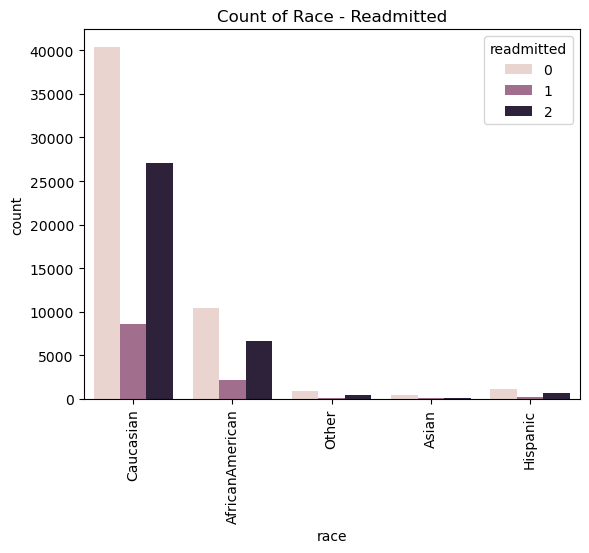

In [87]:
# Show distribution of race

sns.set_palette("hls")
sns.countplot(x='race', hue= "readmitted", data = df)
plt.xticks(rotation=90)
plt.title("Count of Race - Readmitted")
plt.show()

# EDA - Gender

In [89]:
# Show count of gender
df['gender'].value_counts()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [90]:
# Drop unknown/invalid valid
df = df.drop(df[df["gender"]=="Unknown/Invalid"].index, axis=0)

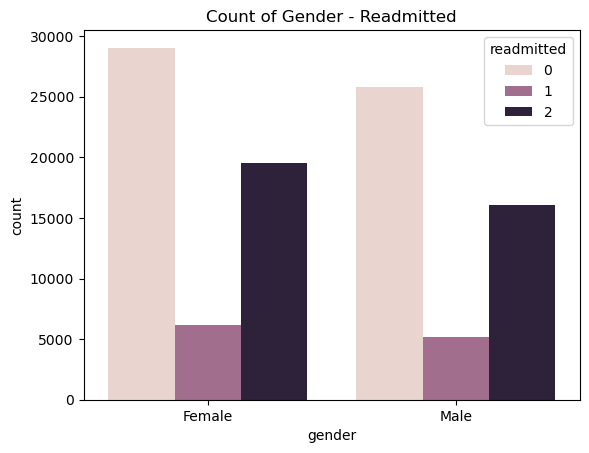

In [91]:
# Show count of gender
sns.set_palette("hls")
sns.countplot(x='gender', hue= "readmitted", data = df)
plt.title("Count of Gender - Readmitted")
plt.show()

# EDA - Number of Procedures¶

In [93]:
# Show count of num_procedures
df['num_procedures'].value_counts()

num_procedures
0    46652
1    20741
2    12716
3     9443
6     4954
4     4180
5     3077
Name: count, dtype: int64

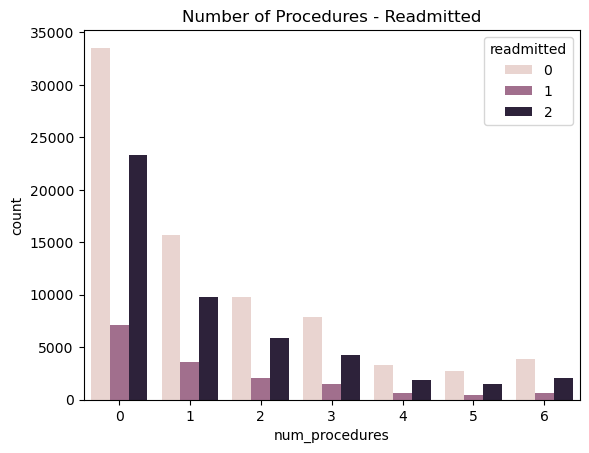

In [94]:
# Show count of num_procedures
sns.set_palette("hls")
sns.countplot(x='num_procedures', hue= "readmitted", data = df_combined)
plt.title("Number of Procedures - Readmitted")
plt.show()

# EDA - Number of Medications

In [96]:
# Show count of num_medications
df['num_medications'].value_counts()

num_medications
13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
70       2
75       2
81       1
79       1
74       1
Name: count, Length: 75, dtype: int64

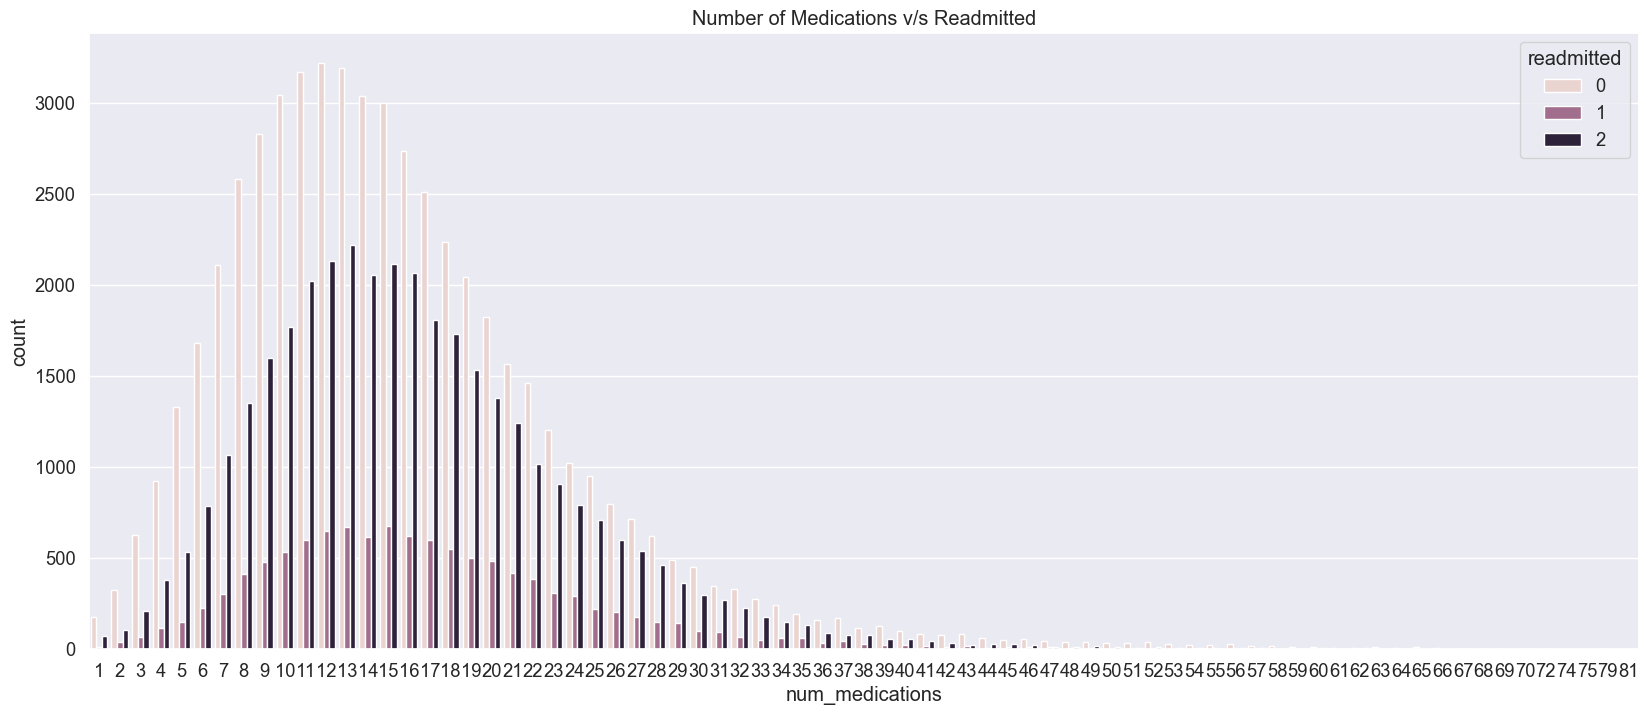

In [264]:
# Show count of num_medications
sns.set_palette("hls")
plt.figure(figsize=(20,8))
sns.countplot(x='num_medications', hue= "readmitted", data = df)
plt.title("Number of Medications v/s Readmitted")
plt.show()

In [98]:
df_combined.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'insulin', 'change',
       'diabetesMed', 'readmitted', 'Patient_ID', 'ICU_Admission_ID',
       'ICU_Length_of_Stay', 'Diagnoses', 'Blood_Glucose', 'Creatinine',
       'Hemoglobin', 'WBC', 'Heart_Rate', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'SpO2', 'Respiratory_Rate', 'Temperature',
       'Medications', 'Number_of_Lab_Tests', 'Number_of_Medications',
       'Readmission_Flag'],
      dtype='object')

In [99]:
# Take average of each age to remove brackets and convert to numeric
# Show count of output value
# 2 = >30 readmissions 48594
# 1 = <30 readmissions 15930
# 0 = no readmissions 76801

df_combined['age'] = df['age'].replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\2578093640.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined['age'] = df['age'].replace({"[70-80)":75,


In [100]:
# Group Analysis:
#  Group by patient characteristics (e.g., age, gender) and compare outcomes.
# Show count of output value
# 2 = >30 readmissions 48594
# 1 = <30 readmissions 15930
# 0 = no readmissions 76801

age_groups = pd.cut(df_combined['age'], bins=[0, 30, 60, 90], labels=["Young", "Middle-aged", "Senior"])
readmission_by_age = df_combined.groupby(age_groups)['readmitted'].value_counts(normalize=True)

C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\3718573770.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmission_by_age = df_combined.groupby(age_groups)['readmitted'].value_counts(normalize=True)


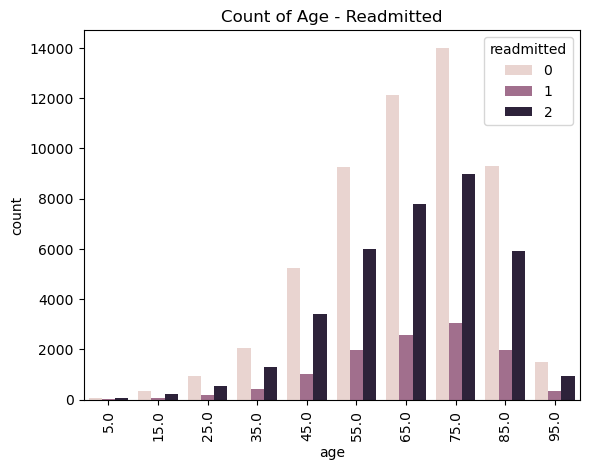

In [101]:
# Show distribution of Race

sns.set_palette("hls")
sns.countplot(x='age', hue= "readmitted", data = df_combined)
plt.xticks(rotation=90)
plt.title("Count of Age - Readmitted")
plt.show()

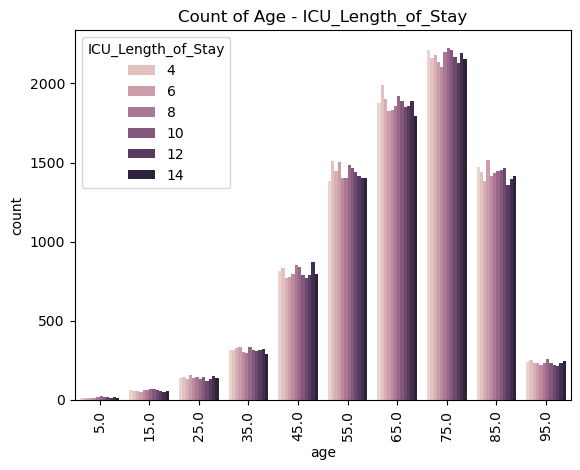

In [102]:
# Show distribution of Age

sns.set_palette("hls")
sns.countplot(x='age', hue= "ICU_Length_of_Stay", data = df_combined)
plt.xticks(rotation=90)
plt.title("Count of Age - ICU_Length_of_Stay")
plt.show()

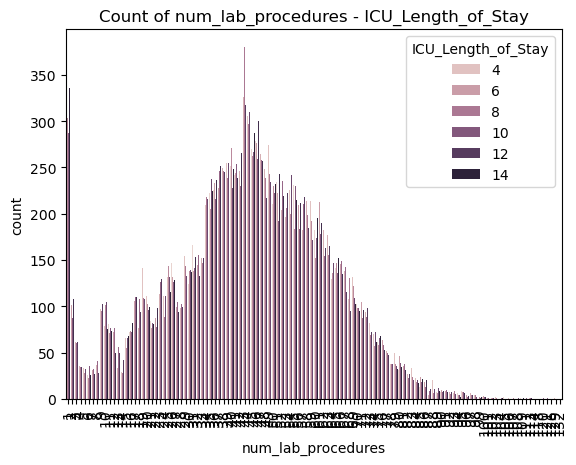

In [103]:
# Show distribution of num_lab_procedures

sns.set_palette("hls")
sns.countplot(x='num_lab_procedures', hue= "ICU_Length_of_Stay", data = df_combined)
plt.xticks(rotation=90)
plt.title("Count of num_lab_procedures - ICU_Length_of_Stay")
plt.show()

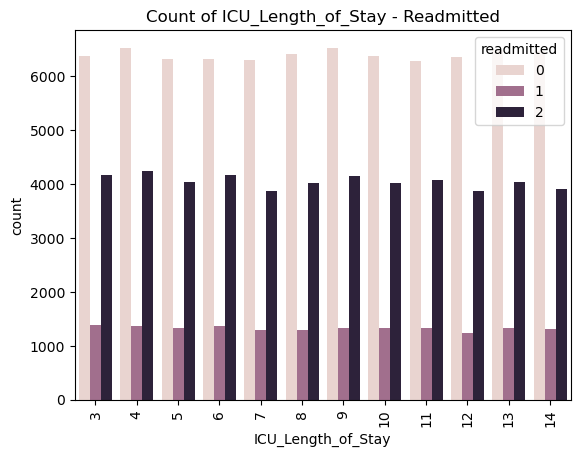

In [104]:
# Show distribution of ICU_Length_of_Stay

sns.set_palette("hls")
sns.countplot(x='ICU_Length_of_Stay', hue= "readmitted", data = df_combined)
plt.xticks(rotation=90)
plt.title("Count of ICU_Length_of_Stay - Readmitted")
plt.show()

# Exploring the potential differences in outcomes based on patient characteristics, including age, gender and diagnosis type

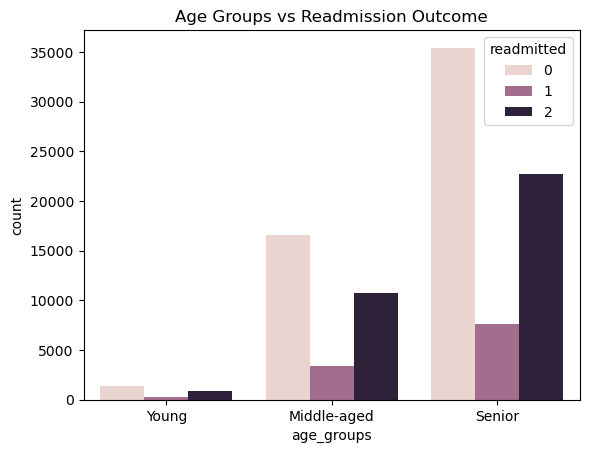

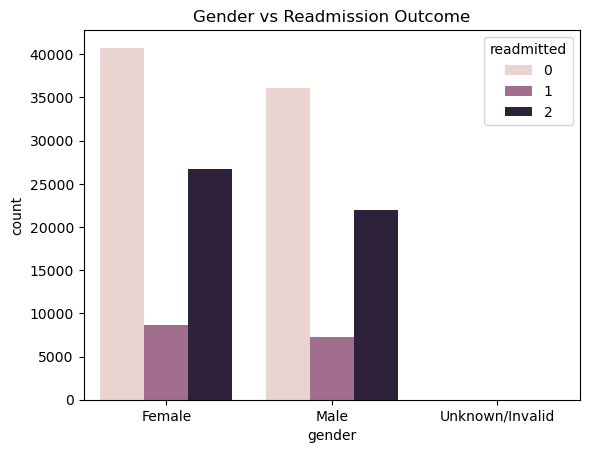

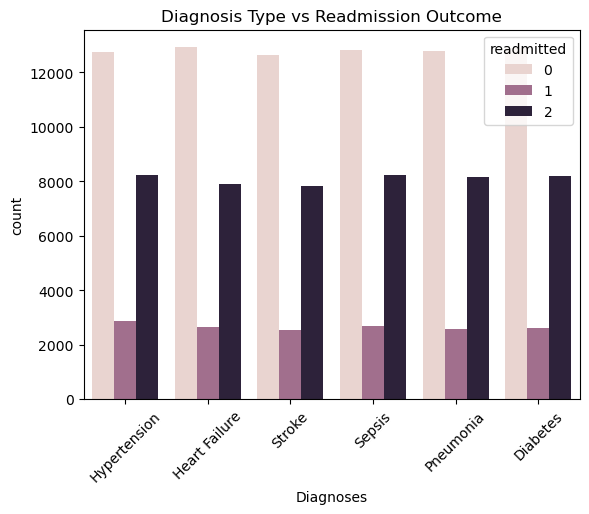

In [106]:
# Age and Readmission
df_combined['age_groups'] = pd.cut(df_combined['age'], bins=[0, 30, 60, 90], labels=["Young", "Middle-aged", "Senior"])
sns.countplot(data=df_combined, x='age_groups', hue='readmitted')
plt.title("Age Groups vs Readmission Outcome")
plt.show()

# Gender and Readmission
sns.countplot(data=df_combined, x='gender', hue='readmitted')
plt.title("Gender vs Readmission Outcome")
plt.show()

# Diagnosis Type and Readmission
sns.countplot(data=df_combined, x='Diagnoses', hue='readmitted')
plt.xticks(rotation=45)
plt.title("Diagnosis Type vs Readmission Outcome")
plt.show()

C:\Users\kashy\AppData\Local\Temp\ipykernel_10260\2118716334.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  readmission_by_age = df_combined.groupby('age_group')['readmitted'].value_counts(normalize=True)


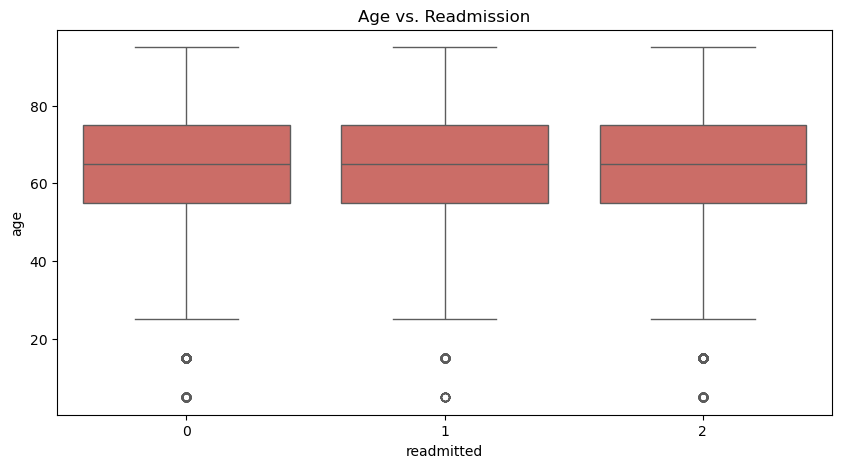

In [107]:
# Create age groups
df_combined['age_group'] = pd.cut(df_combined['age'], bins=[0, 30, 60, 90], labels=["Young", "Middle-aged", "Senior"])

# Calculate readmission rates by age group
readmission_by_age = df_combined.groupby('age_group')['readmitted'].value_counts(normalize=True)

# Plot Age vs. Readmission
plt.figure(figsize=(10, 5))
sns.boxplot(x='readmitted', y='age', data=df_combined)
plt.title('Age vs. Readmission')
plt.show()

In [108]:
service_utilisation = df_combined[['number_outpatient','number_inpatient','number_emergency']]
print(service_utilisation)

        number_outpatient  number_inpatient  number_emergency
0                       0                 0                 0
1                       0                 0                 0
2                       0                 0                 0
3                       0                 0                 0
4                       2                 1                 0
...                   ...               ...               ...
141320                  0                 0                 0
141321                  0                 1                 0
141322                  1                 0                 0
141323                  0                 1                 0
141324                  0                 0                 0

[141325 rows x 3 columns]


# Identifying the potential Risk factors

#Age, Gender, Race, etc shown above also includes in the risk factors

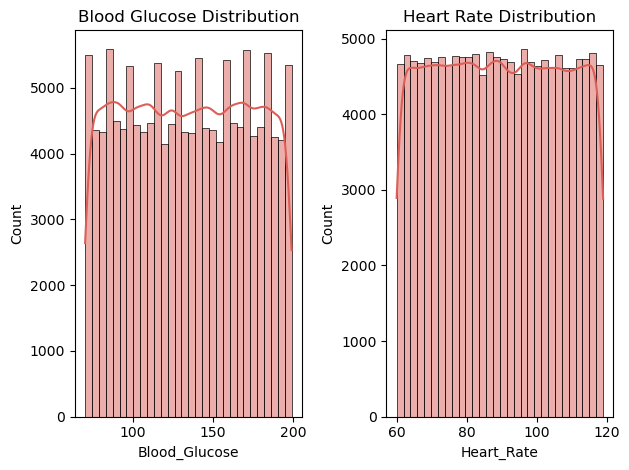

In [111]:
# Histogram for glucose levels
plt.subplot(1, 2, 1)
sns.histplot(x=df_combined['Blood_Glucose'], bins=30, kde=True)
plt.title('Blood Glucose Distribution')

# Histogram for Heart_Rate
plt.subplot(1, 2, 2)
sns.histplot(x=df_combined['Heart_Rate'], bins=30, kde=True)
plt.title('Heart Rate Distribution')

plt.tight_layout()
plt.show()

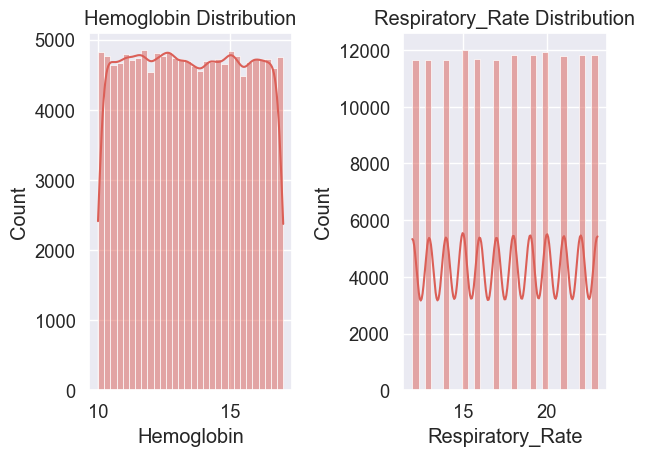

In [266]:
# Histogram for Hemoglobin
plt.subplot(1, 2, 1)
sns.histplot(x=df_combined['Hemoglobin'], bins=30, kde=True)
plt.title('Hemoglobin Distribution')

# Histogram for Respiratory_Rate
plt.subplot(1, 2, 2)
sns.histplot(x=df_combined['Respiratory_Rate'], bins=30, kde=True)
plt.title('Respiratory_Rate Distribution')

plt.tight_layout()
plt.show()  

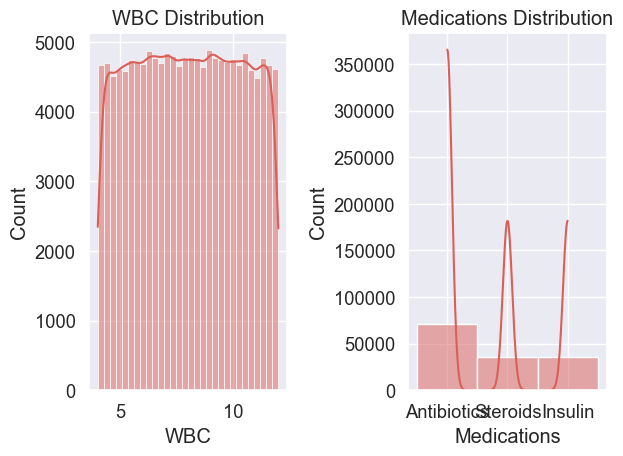

In [268]:
# Histogram for WBC
plt.subplot(1, 2, 1)
sns.histplot(x=df_combined['WBC'], bins=30, kde=True)
plt.title('WBC Distribution')

# Histogram for Heart_Rate
plt.subplot(1, 2, 2)
sns.histplot(x=df_combined['Medications'], bins=30, kde=True)
plt.title('Medications Distribution')

plt.tight_layout()
plt.show()

In [113]:
cat_cols = []

# All categorical columns
for i in df_combined.columns:
    if df_combined[i].dtype == 'object':
        cat_cols.append(i)
        # Printing
        print(i)

patient_nbr
race
gender
medical_specialty
diag_1
diag_2
diag_3
max_glu_serum
A1Cresult
insulin
change
diabetesMed
Patient_ID
Diagnoses
Medications


In [114]:
num_cols = []

# All numerical columns
for i in df_combined.columns:
    if df_combined[i].dtype != 'object':
        num_cols.append(i)
        # Printing
        print(i)

encounter_id
age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
readmitted
ICU_Admission_ID
ICU_Length_of_Stay
Blood_Glucose
Creatinine
Hemoglobin
WBC
Heart_Rate
Blood_Pressure_Systolic
Blood_Pressure_Diastolic
SpO2
Respiratory_Rate
Temperature
Number_of_Lab_Tests
Number_of_Medications
Readmission_Flag
age_groups
age_group


In [115]:
df_numerical = pd.DataFrame(num_cols)

# Studying the correlation between different variables

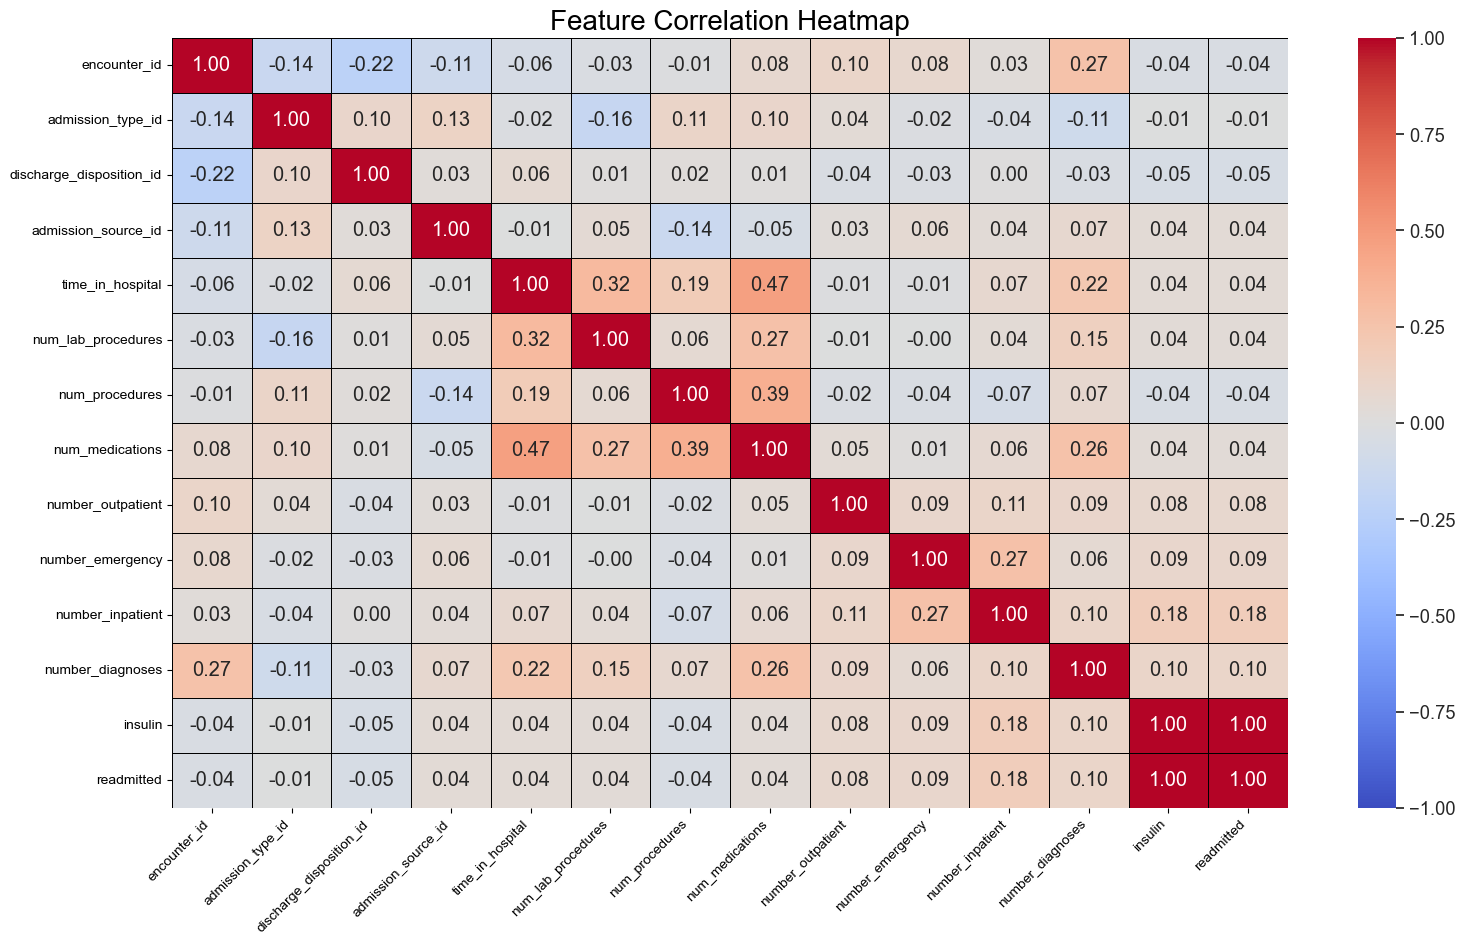

In [117]:
# Ensure 'df' is defined and populated before this step
df_numerical = df.select_dtypes(include=['float64', 'int64'])  # Ensure df_numerical is correctly derived

# Check if df_numerical has numeric columns
if not df_numerical.empty and df_numerical.shape[1] > 1:
    # Set up the matplotlib figure and heatmap styling
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.set(font_scale=1.2)  # Adjusting font size for readability

    # Create a heatmap for correlations
    correlation_matrix = df_numerical.corr()
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",  # Format for correlation values
        vmin=-1,
        vmax=1,
        center=0,
        cmap='coolwarm',
        linewidths=0.5,  # Thinner lines for cleaner look
        linecolor='black'
    )

    # Optional: Set title and adjust tick labels
    ax.set_title("Feature Correlation Heatmap", fontsize=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.show()
else:
    print("No numeric columns found or insufficient data for correlation heatmap.")

# Modelling

In [119]:
# created a dummy data frame
df_cat_one_hot = pd.get_dummies(df_numerical)

In [120]:
# Importing
from sklearn.preprocessing import OneHotEncoder

In [121]:
# Initialising
ohe = OneHotEncoder()

In [122]:
# Let fit our encoder 
ohe.fit(df_cat_one_hot)

OneHotEncoder()

In [123]:
# Let's transform with the help of our encode 
ohe.transform(df_cat_one_hot)

<101763x102122 sparse matrix of type '<class 'numpy.float64'>'
	with 1424682 stored elements in Compressed Sparse Row format>

# Split our data into X and Y

In [125]:
df_final = pd.get_dummies(df_numerical)
df_final.head()

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin,readmitted
0,2278392,5,25,1,1,41,0,1,0,0,0,1,0,0
1,149190,1,1,7,3,59,0,18,0,0,0,9,2,2
2,64410,1,1,7,2,11,5,13,2,0,1,6,0,0
3,500364,1,1,7,2,44,1,16,0,0,0,7,0,0
4,16680,1,1,7,1,51,0,8,0,0,0,5,0,0


In [126]:
# The readmitted column goes in y
y = df_final['readmitted'] 


# Everything apart from readmitted column goes in x
x = df_final.drop('readmitted',axis=1)

In [127]:
x.head()

,encounter_id,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,insulin
0,2278392,5,25,1,1,41,0,1,0,0,0,1,0
1,149190,1,1,7,3,59,0,18,0,0,0,9,2
2,64410,1,1,7,2,11,5,13,2,0,1,6,0
3,500364,1,1,7,2,44,1,16,0,0,0,7,0
4,16680,1,1,7,1,51,0,8,0,0,0,5,0


In [128]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, test_size=0.2)

In [130]:
x_train.shape

(81410, 13)

In [131]:
x_test.shape

(20353, 13)

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
model = DecisionTreeClassifier()

In [134]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [135]:
# Predicting the results through our Model
y_predict = model.predict(x_test)
print(y_predict)

[0 2 0 ... 2 2 2]


In [136]:
y_test

43463    0
33681    2
32407    0
86829    1
81398    2
        ..
30033    2
87413    2
48929    2
77717    2
6423     2
Name: readmitted, Length: 20353, dtype: int64

In [137]:
# Show count of output value
# 2 = >30 readmissions 48594
# 1 = <30 readmissions 15930
# 0 = no readmissions 76801

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [140]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [141]:
from lazypredict.Supervised import LazyClassifier

In [142]:
# Load a sample dataset
data = load_iris()
X = df_final.drop('readmitted',axis=1)
y = df_final['readmitted'] 

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the classifier on the train data and evaluate on the test data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the results
print(models)

 97%|█████████▋| 28/29 [04:11<00:13, 13.57s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 81410, number of used features: 13
[LightGBM] [Info] Start training from score -0.618837
[LightGBM] [Info] Start training from score -2.192543
[LightGBM] [Info] Start training from score -1.050401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

100%|██████████| 29/29 [04:12<00:00, 10.60s/it]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

100%|██████████| 29/29 [04:12<00:00,  8.71s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
AdaBoostClassifier                 1.00               1.00    None      1.00   
LinearDiscriminantAnalysis         1.00               1.00    None      1.00   
XGBClassifier                      1.00               1.00    None      1.00   
SGDClassifier                      1.00               1.00    None      1.00   
RandomForestClassifier             1.00               1.00    None      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00    None      1.00   
BaggingClassifier                  1.00               1.00    None      1.00   
LinearSVC                          1.00               1.00    None      1.00   
LogisticRegression                 1.00               1.00    None      1.00   
GaussianNB                         1.00               1.00    None      1.00   
ExtraTreesClassifier               1.00 